## Mapping the AI Agents Ecosystem: Trends, Sources, and Market Signals in 2026 ##

# Objective of the Project

The objective of this project is to analyze and visualize a real-world dataset related to the AI agents ecosystem in order to:

Identify key platforms contributing to AI-agent content

Understand trends in hiring, tooling, and discussions

Explore how the AI-agent ecosystem evolves over time

1.Setup & Imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime

2.Load & Inspect the Dataset

In [6]:
df = pd.read_csv("AI_Agents_Ecosystem_2026.csv")


df.head()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1206 non-null   object
 1   Source       1206 non-null   object
 2   Date         1206 non-null   object
 3   Description  1206 non-null   object
 4   Link         1204 non-null   object
dtypes: object(5)
memory usage: 47.2+ KB


Title          0
Source         0
Date           0
Description    0
Link           2
dtype: int64

Convert Date Column

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

3.Feature Engineering
3.1 Content Type Classification

In [9]:
def classify_content(text):
    text = str(text).lower()
    if 'job' in text or 'hiring' in text or 'engineer' in text:
        return 'Job Posting'
    elif 'open-source' in text or 'github' in text or 'tool' in text:
        return 'Tool / Project'
    else:
        return 'News / Discussion'


df['Content_Type'] = df['Title'].apply(classify_content)

3.2 Description Length Feature

In [10]:
df['Description_Length'] = df['Description'].astype(str).apply(len)

4. Analytical Questions & Visualizations

Q1. How many AI-agent posts exist per source?

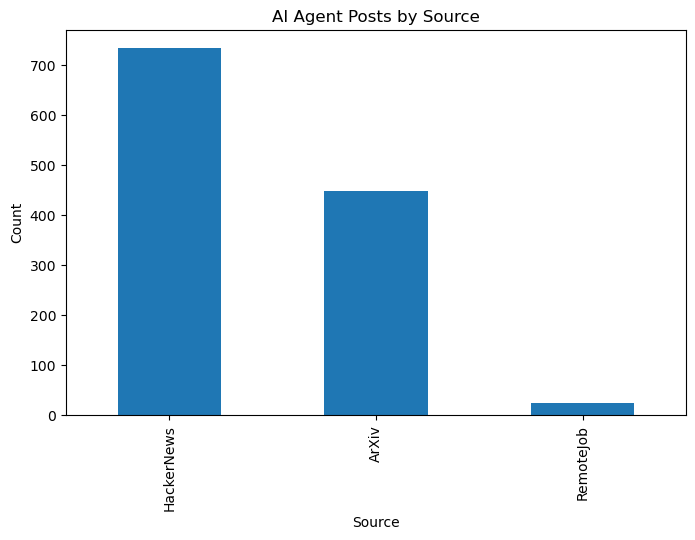

In [11]:
source_counts = df['Source'].value_counts()
source_counts.plot(kind='bar', figsize=(8,5))
plt.title('AI Agent Posts by Source')
plt.ylabel('Count')
plt.show()

Q2. How has AI-agent content changed over time?

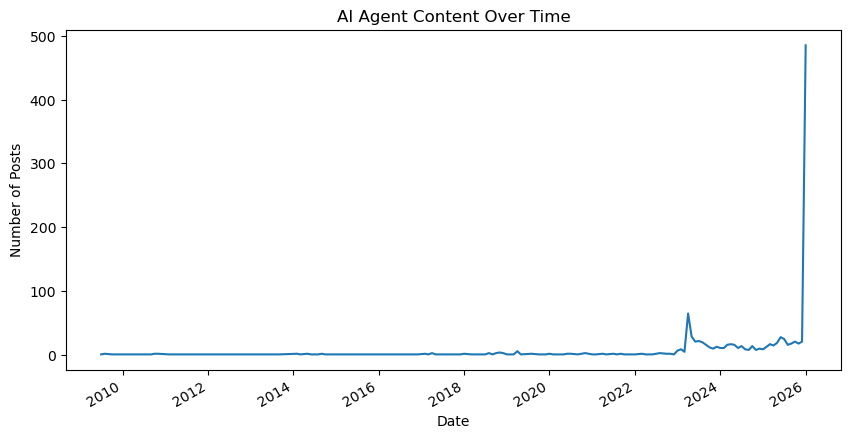

In [12]:
time_series = df.groupby(df['Date'].dt.to_period('M')).size()
time_series.index = time_series.index.to_timestamp()


time_series.plot(figsize=(10,5))
plt.title('AI Agent Content Over Time')
plt.ylabel('Number of Posts')
plt.show()

Q3. What is the distribution of content types?

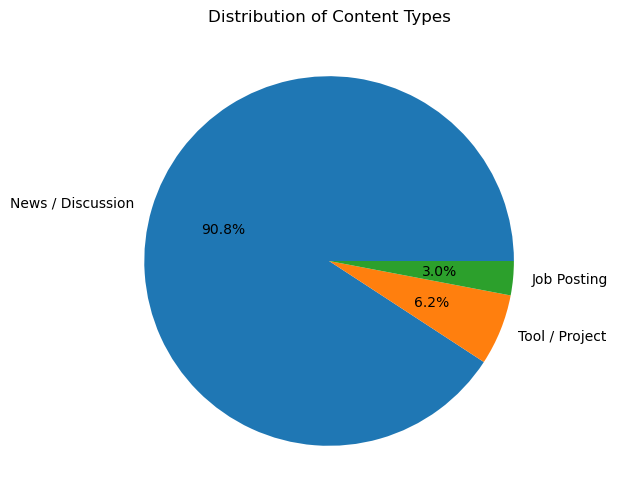

In [13]:
df['Content_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Distribution of Content Types')
plt.ylabel('')
plt.show()

Q4. Which sources post the longest descriptions?

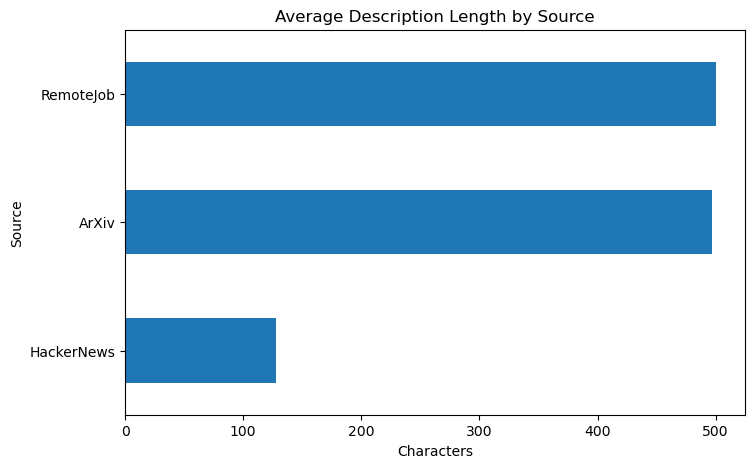

In [14]:
avg_length = df.groupby('Source')['Description_Length'].mean().sort_values()
avg_length.plot(kind='barh', figsize=(8,5))
plt.title('Average Description Length by Source')
plt.xlabel('Characters')
plt.show()

Q5. What keywords dominate AI-agent descriptions?

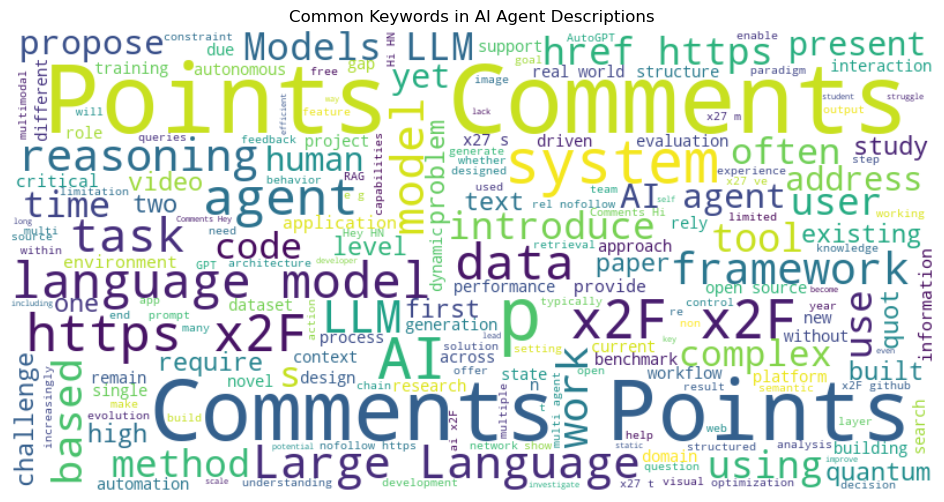

In [16]:
text = ' '.join(df['Description'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Keywords in AI Agent Descriptions')
plt.show()

Q6. Job postings vs other content over time?

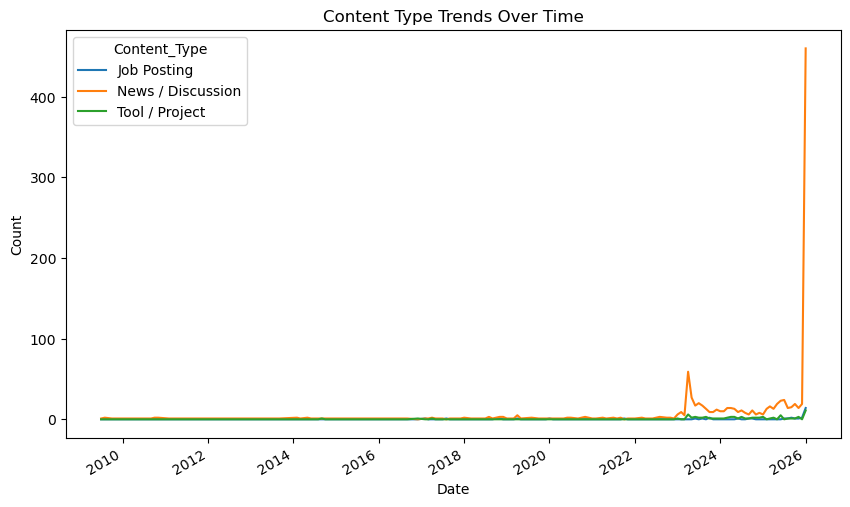

In [17]:
job_time = df.groupby([df['Date'].dt.to_period('M'), 'Content_Type']).size().unstack().fillna(0)
job_time.index = job_time.index.to_timestamp()
job_time.plot(figsize=(10,6))
plt.title('Content Type Trends Over Time')
plt.ylabel('Count')
plt.show()

Q7. Which day has the most AI-agent activity?

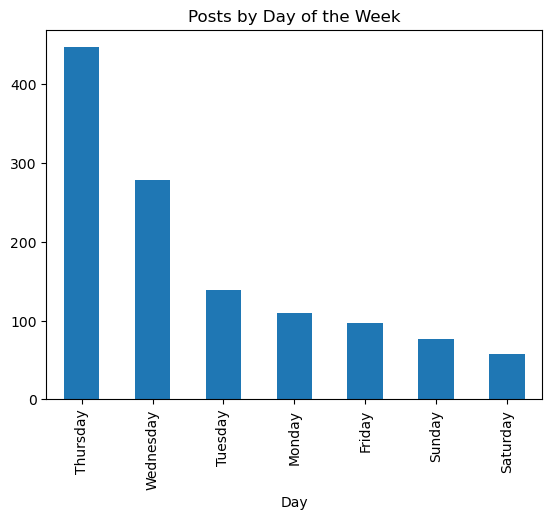

In [18]:
df['Day'] = df['Date'].dt.day_name()
df['Day'].value_counts().plot(kind='bar')
plt.title('Posts by Day of the Week')
plt.show()

Q8. Are job descriptions longer than non-job posts?

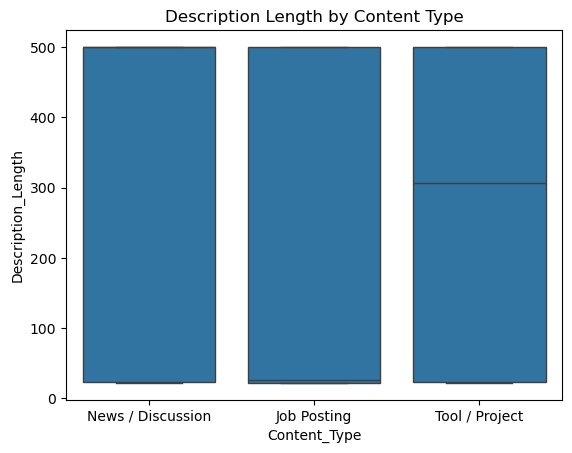

In [19]:
sns.boxplot(x='Content_Type', y='Description_Length', data=df)
plt.title('Description Length by Content Type')
plt.show()

Q9. Top 10 most frequent words in titles

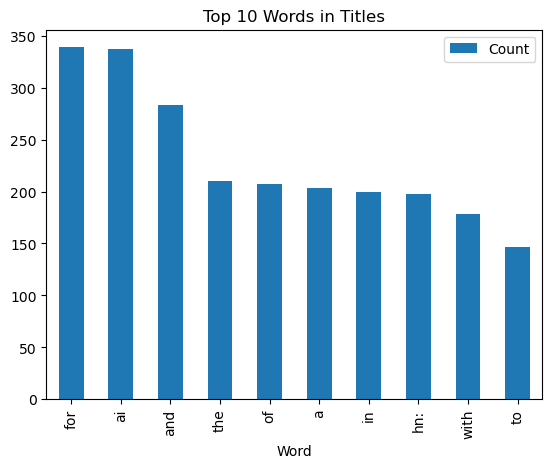

In [20]:
from collections import Counter
words = ' '.join(df['Title']).lower().split()
common_words = Counter(words).most_common(10)
pd.DataFrame(common_words, columns=['Word','Count']).plot(kind='bar', x='Word')
plt.title('Top 10 Words in Titles')
plt.show()

Q10. Which sources focus most on job postings?

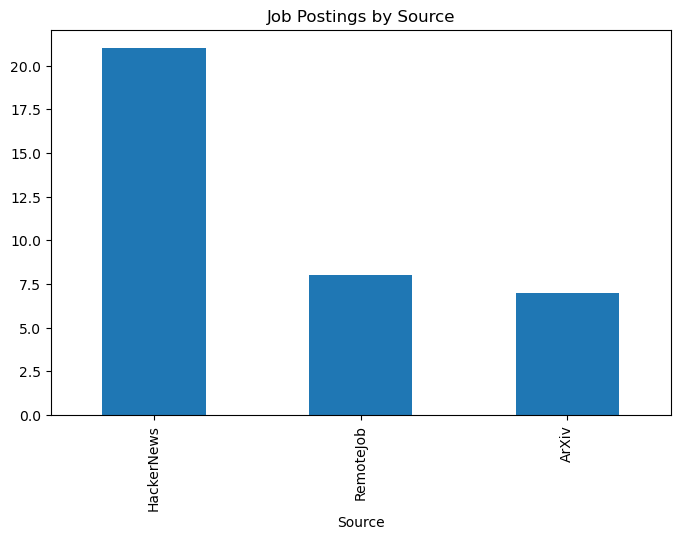

In [21]:
job_source = df[df['Content_Type'] == 'Job Posting']['Source'].value_counts()
job_source.plot(kind='bar', figsize=(8,5))
plt.title('Job Postings by Source')
plt.show()

Q11. Which sources publish the most frequently over time?

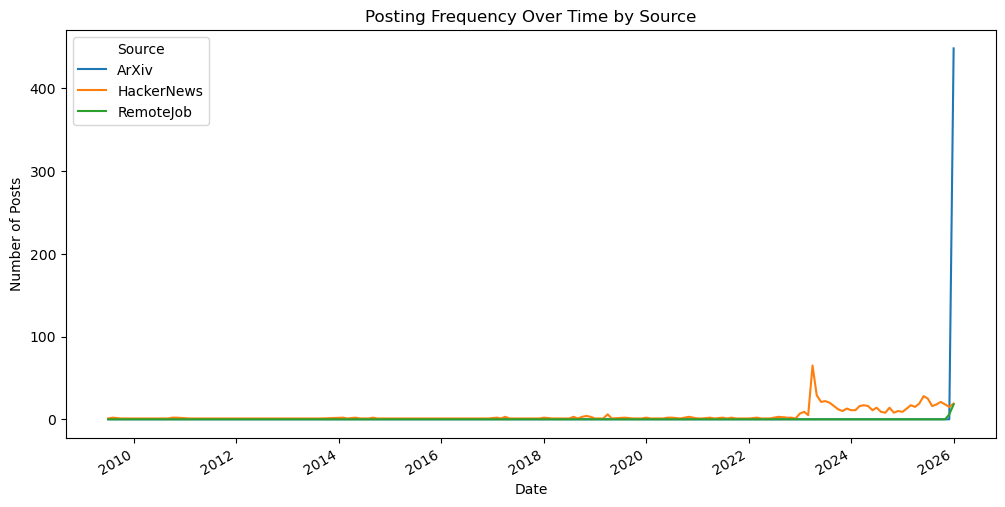

In [22]:
source_time = df.groupby([df['Date'].dt.to_period('M'), 'Source']).size().unstack().fillna(0)
source_time.index = source_time.index.to_timestamp()

source_time.plot(figsize=(12,6))
plt.title('Posting Frequency Over Time by Source')
plt.ylabel('Number of Posts')
plt.xlabel('Date')
plt.legend(title='Source')
plt.show()


Q12. What proportion of total content is job-related vs non-job?

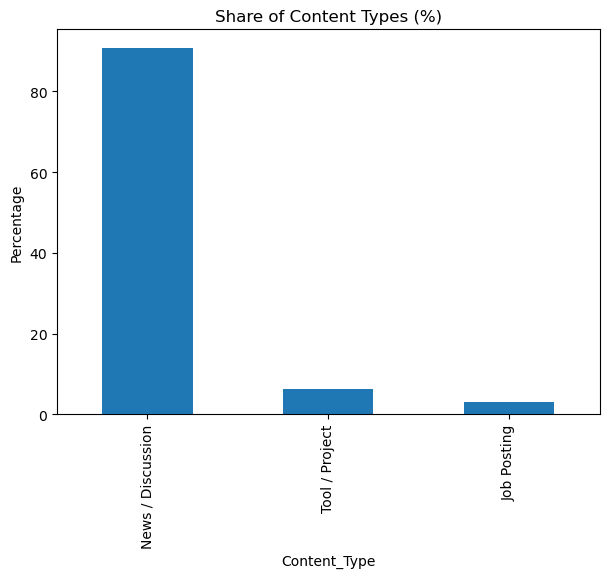

In [23]:
content_share = df['Content_Type'].value_counts(normalize=True) * 100

content_share.plot(kind='bar', figsize=(7,5))
plt.title('Share of Content Types (%)')
plt.ylabel('Percentage')
plt.show()


Q13. Which months have the highest AI-agent activity?

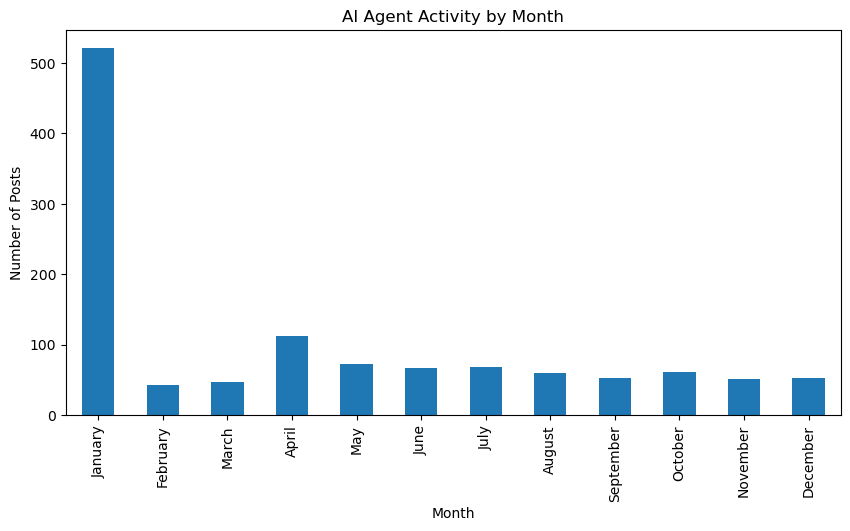

In [24]:
df['Month'] = df['Date'].dt.month_name()

df['Month'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]).plot(kind='bar', figsize=(10,5))

plt.title('AI Agent Activity by Month')
plt.ylabel('Number of Posts')
plt.show()


Q14. Do certain sources specialize in specific content types?

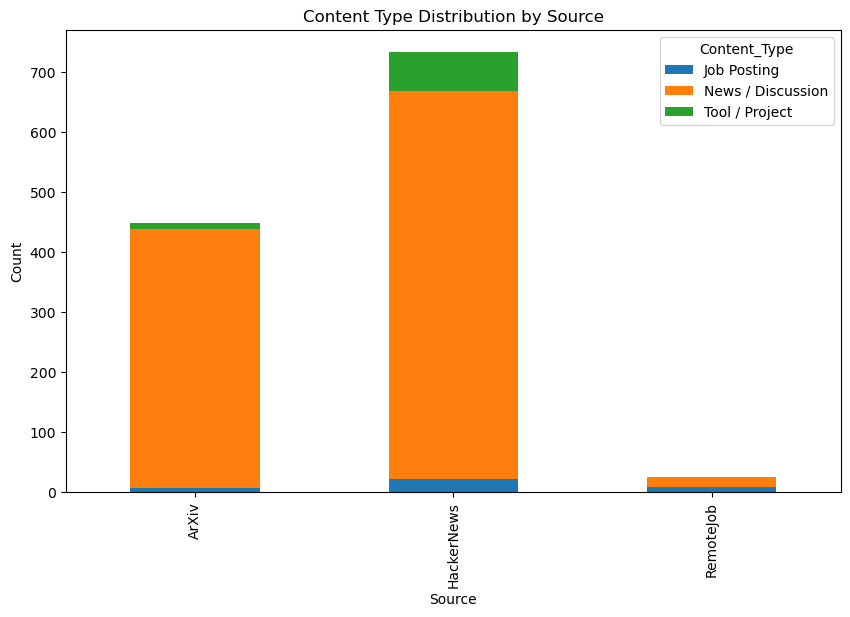

In [25]:
source_type = pd.crosstab(df['Source'], df['Content_Type'])

source_type.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Content Type Distribution by Source')
plt.ylabel('Count')
plt.show()


Q15. Are job postings becoming more detailed over time?

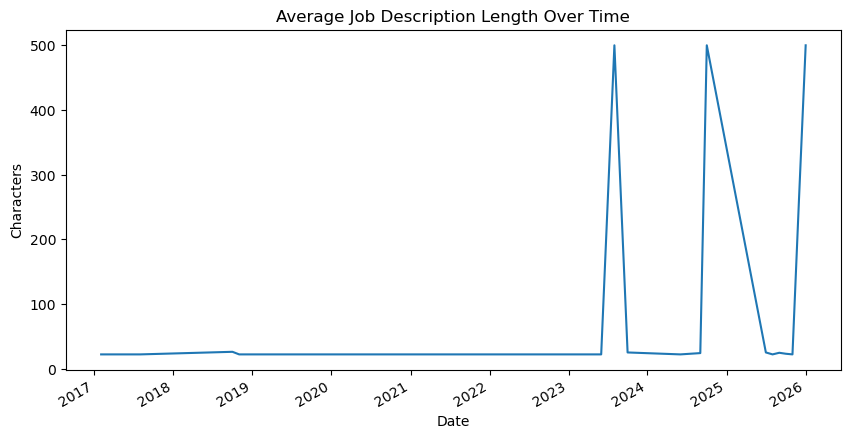

In [26]:
jobs = df[df['Content_Type'] == 'Job Posting']

job_length_time = jobs.groupby(jobs['Date'].dt.to_period('M'))['Description_Length'].mean()
job_length_time.index = job_length_time.index.to_timestamp()

job_length_time.plot(figsize=(10,5))
plt.title('Average Job Description Length Over Time')
plt.ylabel('Characters')
plt.xlabel('Date')
plt.show()
